### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [87]:
#Answer #1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Import the necessary packages - 2.5 marks

In [88]:
#Answer #2
Data = pd.read_csv('Data.csv')  # read the data
Item = pd.read_csv('item.csv')  # read the item data
User = pd.read_csv('user.csv')  # read the user data
User.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [83]:
#Answer #3
Data.info()
print (Data.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
(100000, 4)


In [84]:
Item.info()
print (Item.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [85]:
User.info()
User.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


(943, 5)

In [27]:
Data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [28]:
Item.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
Item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [30]:
User.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [31]:
pd.DataFrame(Data.isnull().sum())

,0
user id,0
movie id,0
rating,0
timestamp,0


In [32]:
pd.DataFrame(Item.isnull().sum())

,0
movie id,0
movie title,0
release date,0
unknown,0
Action,0
Adventure,0
Animation,0
Childrens,0
Comedy,0
Crime,0


In [33]:
pd.DataFrame(User.isnull().sum())

,0
user id,0
age,0
gender,0
occupation,0
zip code,0


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [86]:
#Answer # 4 - number of movies per genre
TempItem = Item.drop(['movie id','movie title','release date'],axis=1) #remove unnecessary columns
TempItem.sum()


unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [35]:
# Answer #5
#first find genres for each movie and then select rows with more than one genre
tempgenre = Item.filter(['movie id', 'movie title'])

tempgenre["sum"] = TempItem.sum(axis=1)
print(tempgenre.shape)
Item.index
Item.columns
tempgenre.head()



(1681, 3)


,movie id,movie title,sum
0,1,Toy Story,3
1,2,GoldenEye,3
2,3,Four Rooms,1
3,4,Get Shorty,3
4,5,Copycat,3


#### 5. Find the movies that have more than one genre - 5 marks

In [36]:
#Answer #5
tempgenremorethanone = tempgenre.loc[(tempgenre['sum']>1)]
print(tempgenremorethanone.shape)
print(len(tempgenremorethanone)) #this is the number of movies with more than one genre, it is 849
tempgenremorethanone.head()


(849, 3)
849


,movie id,movie title,sum
0,1,Toy Story,3
1,2,GoldenEye,3
3,4,Get Shorty,3
4,5,Copycat,3
6,7,Twelve Monkeys,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [37]:
#Answer #6
print(Item[Item['unknown'] ==1].index) #find row index id of 'unknown'

#row index id of 'unknown' found to be 1371, drop it and save the dataframe as Item2
Item2 = Item.drop(1371)
print(Item2[Item2['unknown'] ==1]) #ensure that uknown is truly gone

print(Item2.shape)
Item2.head()
#FOR ALL FURTHER ANALYSIS WE SHALL USE ITEM2 AS WE ARE NOT INTERESTED IN 'UNKNOWN'

Int64Index([1371], dtype='int64')
Empty DataFrame
Columns: [movie id, movie title, release date, unknown, Action, Adventure, Animation, Childrens, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western]
Index: []

[0 rows x 22 columns]
(1680, 22)


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [38]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 0 to 1680
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1680 non-null   int64 
 1   movie title   1680 non-null   object
 2   release date  1680 non-null   object
 3   unknown       1680 non-null   int64 
 4   Action        1680 non-null   int64 
 5   Adventure     1680 non-null   int64 
 6   Animation     1680 non-null   int64 
 7   Childrens     1680 non-null   int64 
 8   Comedy        1680 non-null   int64 
 9   Crime         1680 non-null   int64 
 10  Documentary   1680 non-null   int64 
 11  Drama         1680 non-null   int64 
 12  Fantasy       1680 non-null   int64 
 13  Film-Noir     1680 non-null   int64 
 14  Horror        1680 non-null   int64 
 15  Musical       1680 non-null   int64 
 16  Mystery       1680 non-null   int64 
 17  Romance       1680 non-null   int64 
 18  Sci-Fi        1680 non-null   int64 
 19  Thrill

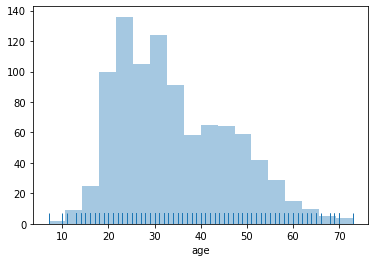

In [39]:
#Answer #7
#DERIVE RELEASE YEAR FROM RELEASE DATE AND ADD IT TO DATAFRAME ITEM2

def get_year(rel_date):
    rel_year = rel_date.split('-')[2]
    return rel_year
Item2['rel_year'] = Item2['release date'].apply(get_year) #Add rel year as addtinal column to Item2

Item2['rel_year']=Item2['rel_year'].astype(int) #Make numeric to ensure it is included in heatmap later on
print(Item2.info())

print(Item2.tail()) #JUST CHECK THAT RELEASE YEAR APPEARS

#Age univariate from dataframe User


sns.distplot(User['age'], kde=False,rug=True)
#the plot shows max user density arond age 20 and 30 and steady decline after 50
    

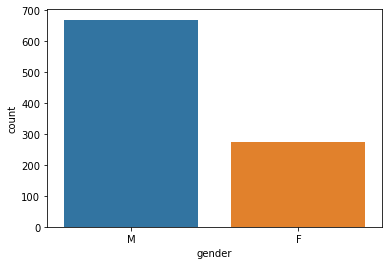

In [40]:
sns.countplot(User['gender']); 
#The gender mix shows around 650 men and just under 300 women, roughly 70% are men

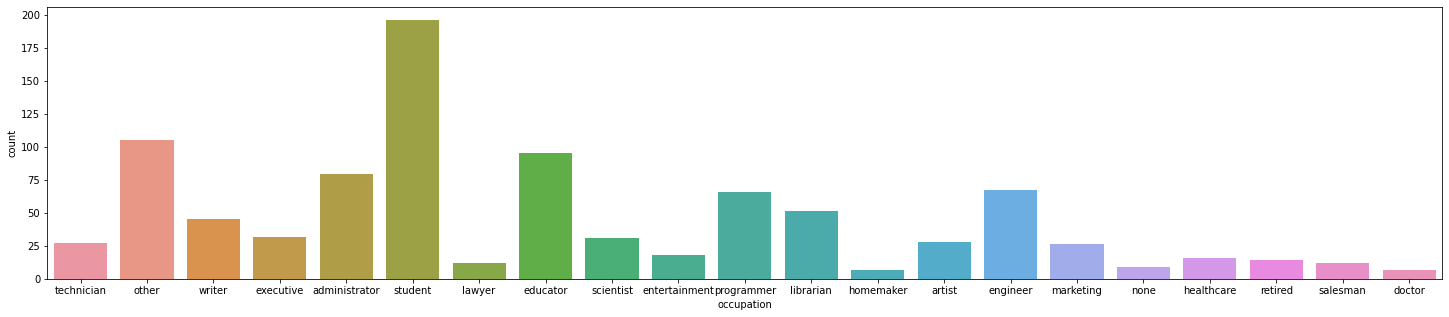

In [41]:
plt.figure(figsize=(25,5))
sns.countplot(User['occupation']);
#The plot shows most of the users are students(just under 200)

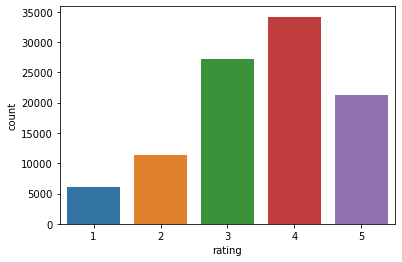

In [42]:
sns.countplot(Data['rating']);
#The ratings data shows majority of ratings over 4

1922
1998


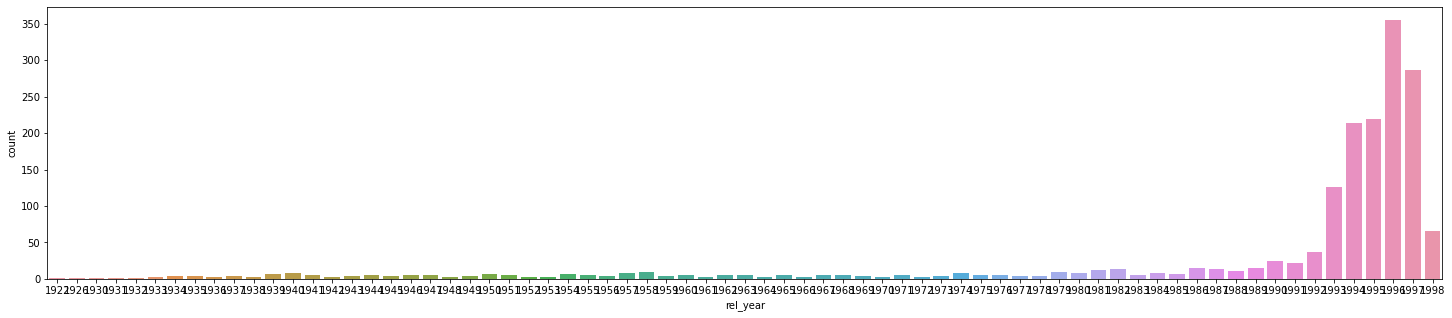

In [43]:
plt.figure(figsize=(25,5))
sns.countplot(Item2['rel_year']);
print(Item2['rel_year'].min())
print(Item2['rel_year'].max())
#the plot shows majority of movies released towards later years (1998)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [44]:
#Answer #8
#First group by release year and get all the sums
Item4 = Item2.groupby(['rel_year'], as_index=False).sum()
print(Item4.shape)
Item4.tail()


(71, 21)


,rel_year,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
66,1994,189000,0,30,13,4,15,82,8,9,...,3,0,8,2,2,35,7,25,7,6
67,1995,183514,0,40,22,6,21,63,11,5,...,3,1,14,3,5,37,15,39,5,2
68,1996,322295,0,44,24,9,21,108,21,18,...,6,1,11,9,6,38,15,47,9,2
69,1997,253649,0,46,20,3,22,87,30,6,...,4,2,8,5,18,51,13,54,14,0
70,1998,75341,0,12,3,0,1,13,7,3,...,1,2,4,1,3,11,5,18,0,0


In [45]:
Item5 = Item4.drop(['movie id','unknown'], axis=1) #unknown does not have any data now and come as NAN so dropped
#created new dataframe Item5 from Item4 by dropping columns movie id and Unknown as they won't be used in heatmap
Item5.info()
print(Item5.head())
cor = Item5.corr() #for hearmap
cor

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 70
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   rel_year     71 non-null     int64
 1   Action       71 non-null     int64
 2   Adventure    71 non-null     int64
 3   Animation    71 non-null     int64
 4   Childrens    71 non-null     int64
 5   Comedy       71 non-null     int64
 6   Crime        71 non-null     int64
 7   Documentary  71 non-null     int64
 8   Drama        71 non-null     int64
 9   Fantasy      71 non-null     int64
 10  Film-Noir    71 non-null     int64
 11  Horror       71 non-null     int64
 12  Musical      71 non-null     int64
 13  Mystery      71 non-null     int64
 14  Romance      71 non-null     int64
 15  Sci-Fi       71 non-null     int64
 16  Thriller     71 non-null     int64
 17  War          71 non-null     int64
 18  Western      71 non-null     int64
dtypes: int64(19)
memory usage: 11.1 KB
   rel_year  Acti

,rel_year,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
rel_year,1.000000,0.528993,0.493890,0.396602,0.422427,0.468469,0.440105,0.424715,0.476138,0.437085,0.089090,0.585856,0.321838,0.343048,0.459875,0.576724,0.473274,0.463070,0.331749
Action,0.528993,1.000000,0.977784,0.832775,0.963787,0.969068,0.929657,0.865242,0.965576,0.897723,0.328030,0.908004,0.739871,0.806928,0.981135,0.950282,0.981843,0.894841,0.514889
Adventure,0.493890,0.977784,1.000000,0.874146,0.970262,0.953711,0.885964,0.867590,0.955208,0.908563,0.304062,0.899178,0.750742,0.754278,0.949474,0.951585,0.958900,0.866768,0.481848
Animation,0.396602,0.832775,0.874146,1.000000,0.860139,0.852857,0.708669,0.862025,0.862869,0.838090,0.148830,0.827056,0.759612,0.511676,0.796483,0.831354,0.806374,0.700561,0.468926
Childrens,0.422427,0.963787,0.970262,0.860139,1.000000,0.958548,0.894970,0.843772,0.941300,0.911112,0.280686,0.865772,0.760221,0.778650,0.968837,0.913570,0.957745,0.881658,0.501322
Comedy,0.468469,0.969068,0.953711,0.852857,0.958548,1.000000,0.902980,0.930997,0.988171,0.931375,0.277763,0.861675,0.785992,0.751494,0.967436,0.906900,0.952820,0.897273,0.577770
Crime,0.440105,0.929657,0.885964,0.708669,0.894970,0.902980,1.000000,0.794012,0.903846,0.858383,0.424711,0.771088,0.739170,0.914291,0.934465,0.860606,0.961927,0.904114,0.325680
Documentary,0.424715,0.865242,0.867590,0.862025,0.843772,0.930997,0.794012,1.000000,0.955886,0.908199,0.255924,0.766837,0.797865,0.571316,0.833167,0.819499,0.853728,0.754705,0.560610
Drama,0.476138,0.965576,0.955208,0.862869,0.941300,0.988171,0.903846,0.955886,1.000000,0.933143,0.313689,0.859789,0.808682,0.741097,0.946286,0.924301,0.955619,0.873312,0.538105
Fantasy,0.437085,0.897723,0.908563,0.838090,0.911112,0.931375,0.858383,0.908199,0.933143,1.000000,0.276289,0.806592,0.817351,0.682912,0.891091,0.861227,0.906783,0.820854,0.457169


In [ ]:
#produce heatmap and focus on corrlation with rel_year axix for varoous genres to gauge popularity over years

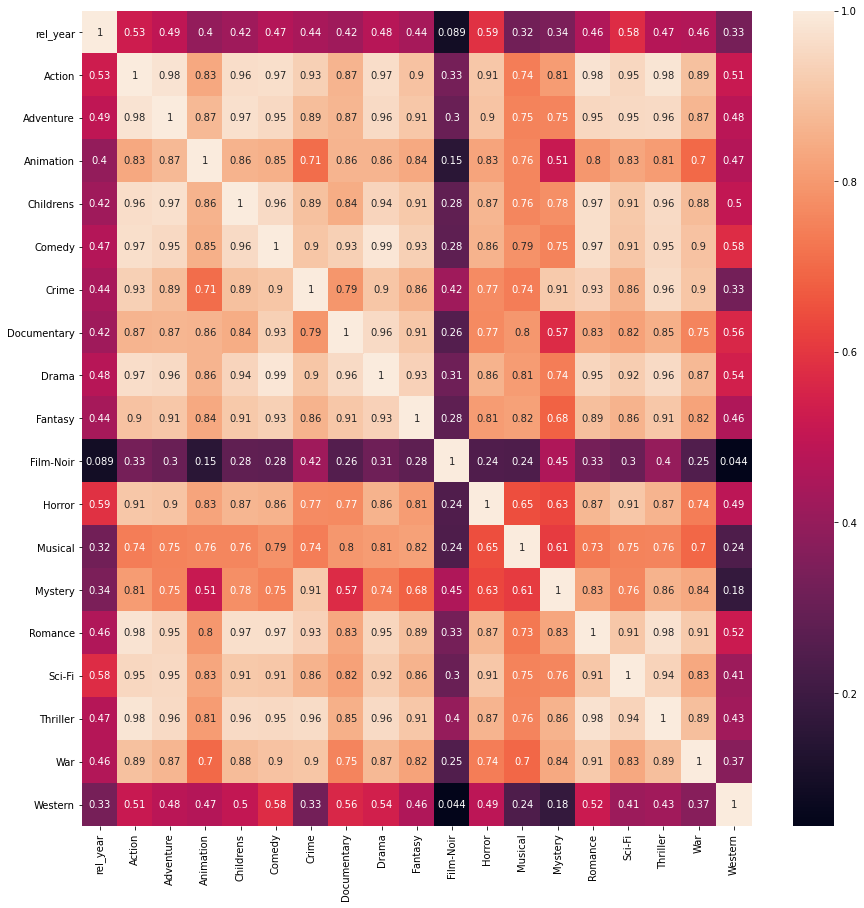

In [46]:
plt.figure(figsize=(15,15))
#sns.heatmap(cor,annot=True,cmap='plasma',vmin=-1,vmax=1)
#sns.heatmap(cor,annot=True,vmin=-1,vmax=1)
sns.heatmap(cor,annot=True)
#The heatmap shows nothing is negatively corrleated with rel_year (expected)
#Film-noir shows almost zero correlation with release year
#strongest correlation (close or higher than 0.5) is shown by Horror, Sci-Fi, Action with Horror being highest (0.59)

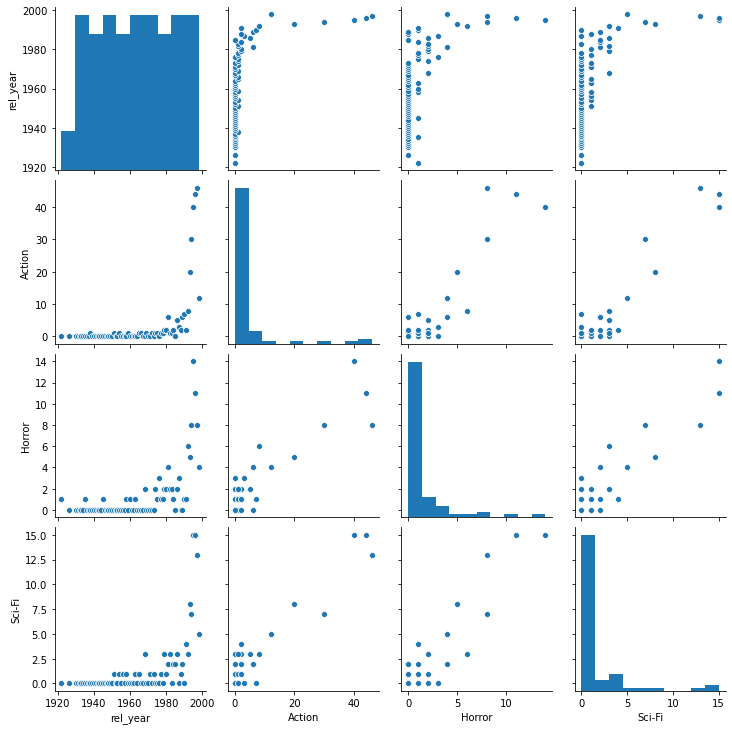

In [51]:
#produce pairplots to check one-one relationships for some selected generes showing >0.50 co-relation
#showing pairplots for all the generes is unwieddy and doesn;t show info properly
#sns.pairplot(data=Item5,
                  #x_vars=['rel_year'],
                  #y_vars=['Action', 'Horror', 'Sci-Fi'])
sns.pairplot(Item5[['rel_year', 'Action', 'Horror', 'Sci-Fi']]);

#the pair plot shows that with advancing release year, the nunmbers in these genre show increase, confirming positive corr

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [18]:
#Answer #9
#First grouby movie id and get counts
Data2 = Data[['movie id', 'rating']].groupby(['movie id'], as_index=False).count()
Data3 = Data2.loc[(Data2['rating']>100)] #select those where number of rating higher than 100
print(Data3.shape)
print(Data3.head())
#Datalist = Data3['movie id'].values.tolist()
#print(type(Datalist))
#print(Datalist)

#Now get avrage ratings grouped by movie id
Data4 = Data[['movie id', 'rating']].groupby(['movie id'], as_index=False).mean()
Data4.head()
#sort by rating(descending)
sorted_Data4 = Data4.sort_values(by='rating', ascending=False)
#sorted_Data4.head()
print(sorted_Data4.shape)

#Now work to get the requested 25 movies by filrering the sorted dataframe using isin command
filtered_Data4 = sorted_Data4.loc[(sorted_Data4['movie id'].isin(Data3['movie id']))]
filtered_Data4.shape
filtered_Data4.head()

#To get movie name merge with Item dataset on movie id
df10 = pd.merge(filtered_Data4,Item,how='inner',on='movie id')

#Now display the top 25
df10.head(25) #This will list the 25 movies in descending order of the rating

(334, 2)
   movie id  rating
0         1     452
1         2     131
3         4     209
6         7     392
7         8     219
<class 'list'>
(1682, 2)


,movie id,rating,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,408,4.491071,"Close Shave, A",28-Apr-1996,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,318,4.466443,Schindler's List,01-Jan-1993,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,169,4.466102,"Wrong Trousers, The",01-Jan-1993,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,483,4.456790,Casablanca,01-Jan-1942,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,64,4.445230,"Shawshank Redemption, The",01-Jan-1994,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,603,4.387560,Rear Window,01-Jan-1954,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6,12,4.385768,"Usual Suspects, The",14-Aug-1995,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,50,4.358491,Star Wars,01-Jan-1977,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
8,178,4.344000,12 Angry Men,01-Jan-1957,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,134,4.292929,Citizen Kane,01-Jan-1941,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
#Answer #10
#To answer this question we need to merge all the 3 datasets
#First merge Item dataset with Data dataset so that we get userid and rating. Note the increase in number
#of rows as now movie id is repeated for each user id and rating in the merged dataset
df20 = pd.merge(Item2,Data,how='inner',on='movie id')
print(df20.head())
print(df20.shape)

#Now merge this dataset with User to get the gender information. Note that number of rows will remain same as for
#each user id in df21, there is only one row in User
df21 = pd.merge(df20,User,how='inner',on='user id')
print(df21.shape)
print(df21.head())
# Now group by gender to get gender related counts for each genre
df22 = df21.groupby(['gender'], as_index=False).sum()
print(df22.head())

#To check the 3 statements on geneder based usage
print("Comparitive numbers\n", df22[['gender','Drama','Sci-Fi','Romance', 'rating']])

#print percentages of men/women
df_women = df22.loc[(df22['gender']=='F')] #select women from df22
#print(df_women.head())
#print(df_women.info())
df_women.drop(['gender', 'unknown'], axis=1, inplace=True)

df_men = df22.loc[(df22['gender']=='M')] #select men from df22
df_men.drop(['gender', 'unknown'], axis=1, inplace=True)
#print(df_men.head())
#df_men.index = df_women.index
df_ratio = df_men.div(df_women.values)
#show comparison of men to women
print("Men to women ratios")
df_ratio[['Drama','Sci-Fi','Romance', 'rating']]
#The data shows us the count for each gender against these genres. We can see that for all 3 categoroes
# nuber of men is more than women with biggest diffewrence for sci-fi
#However we must note that the users table have far  more men than women (look at the user graph earlier) therefore our dataset here 
# is not a good representation of population


   movie id movie title release date  unknown  Action  Adventure  Animation  \
0         1  Toy Story   01-Jan-1995        0       0          0          1   
1         1  Toy Story   01-Jan-1995        0       0          0          1   
2         1  Toy Story   01-Jan-1995        0       0          0          1   
3         1  Toy Story   01-Jan-1995        0       0          0          1   
4         1  Toy Story   01-Jan-1995        0       0          0          1   

   Childrens  Comedy  Crime  ...  Mystery  Romance  Sci-Fi  Thriller  War  \
0          1       1      0  ...        0        0       0         0    0   
1          1       1      0  ...        0        0       0         0    0   
2          1       1      0  ...        0        0       0         0    0   
3          1       1      0  ...        0        0       0         0    0   
4          1       1      0  ...        0        0       0         0    0   

   Western  rel_year  user id  rating  timestamp  
0        0 

C:\Users\ddaml\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Drama,Sci-Fi,Romance,rating
1,2.624182,3.842145,2.322124,2.883139


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



#write the conclusions here
1. None of the datasets have null values
2. Item dataset has only one row with genre 'unknown' this can be safely deleted from the table witnout impacting analysis outcomes
3. The heatmap shows some collrelation for horror, sci-fi. action with repsect to release year where the index is greater than 0.5. There is nothing with negative correlation (this is not surprising given nature of the data i.e. the number of movies have not reduced with release year increasing). There is one genre 'film-noir' which is showing almost zero corrleation
4. Regarding question 10, men seem to be watching all the 3 genres (drama, sci-fi, romance) more than women. The difference is most for sci-fi where the number of men watching it is almost 4 times that of women.
5. However the users table have more than twice men as women, which is not reflective of overall population so our sample for gender based analysis may not be representative. 